In [84]:
#importing the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

#import the csv file and read the datatype
data = pd.read_csv('FinalData.csv', delimiter= ",")
print(data.dtypes)

Application Number            object
Submission Type and Number    object
Established Name              object
Applicant                     object
Approval Year                  int64
Use                           object
dtype: object


/var/folders/ch/ynmgkg1n1mzc0_p3f2xcwr580000gn/T/ipykernel_59053/2236865269.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='viridis')


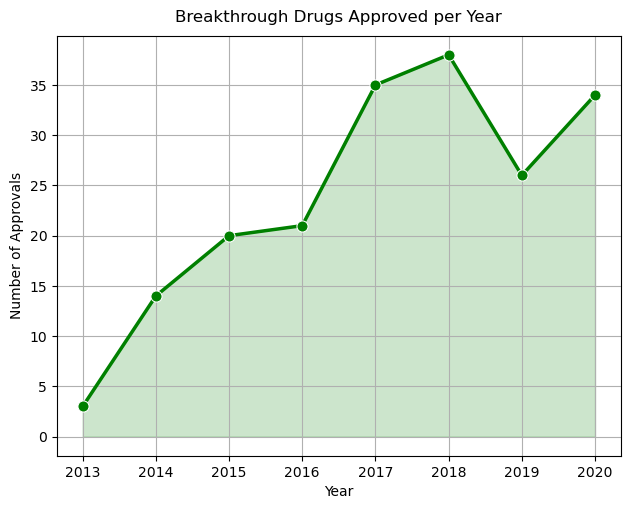

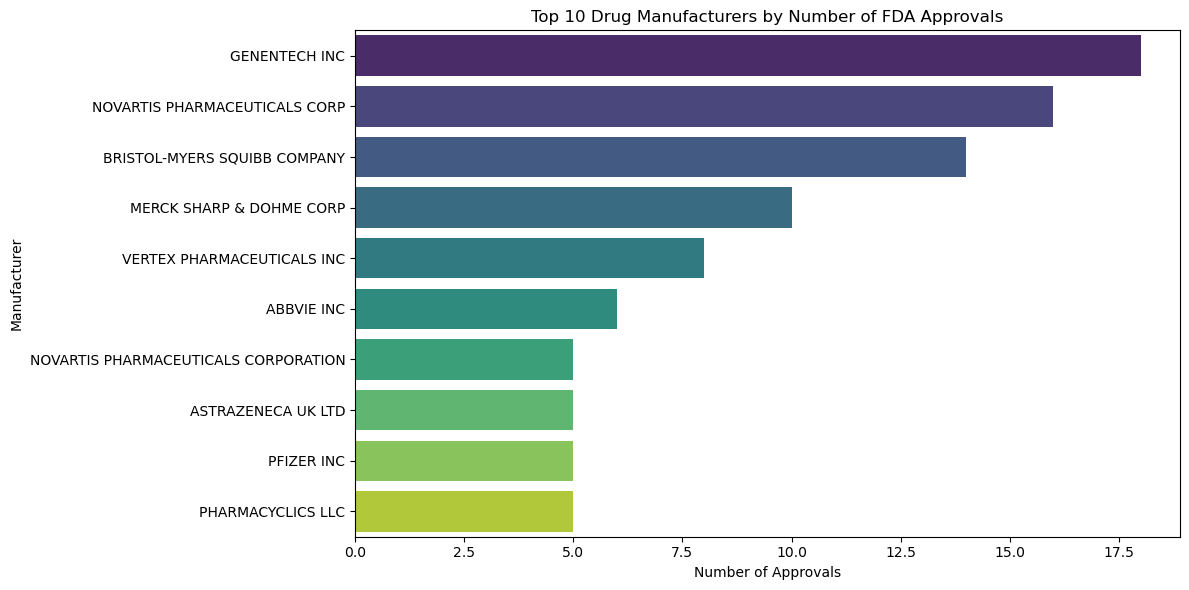

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the data
df = pd.read_csv('FinalData.csv')

# Clean the data
# I am converting the column to numeric values and then changing the non-numeric values to NaN using errors = 'coerce'
df['Approval Year'] = pd.to_numeric(df['Approval Year'], errors='coerce')
df = df.dropna(subset=['Approval Year']) # Using dropna to drop the NaN
df['Approval Year'] = df['Approval Year'].astype(int) # Converting approved values to integers

# Create visualization canvas
plt.figure(figsize=(16, 12))

# Approval Rate Timeline
plot1 = plt.subplot(2, 2, 1)
yearly_counts = df['Approval Year'].value_counts().sort_index() # Counting and sorting the number of drug approvals in chronological order
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, 
             marker='o', markersize=8, linewidth=2.5, color='green')
plt.fill_between(yearly_counts.index, yearly_counts.values, alpha= 0.2, color='green')
plt.title("Breakthrough Drugs Approved per Year", pad=10)
plt.xlabel("Year")
plt.ylabel("Number of Approvals")
plt.grid(True)


# 2. Top Manufacturers
plt.figure(figsize=(12, 6))
top_manufacturers = df['Applicant'].value_counts().head(10) # Retrieves the top 10 manufacturers by number of approvals
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='viridis')
plt.title('Top 10 Drug Manufacturers by Number of FDA Approvals')
plt.xlabel('Number of Approvals')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()


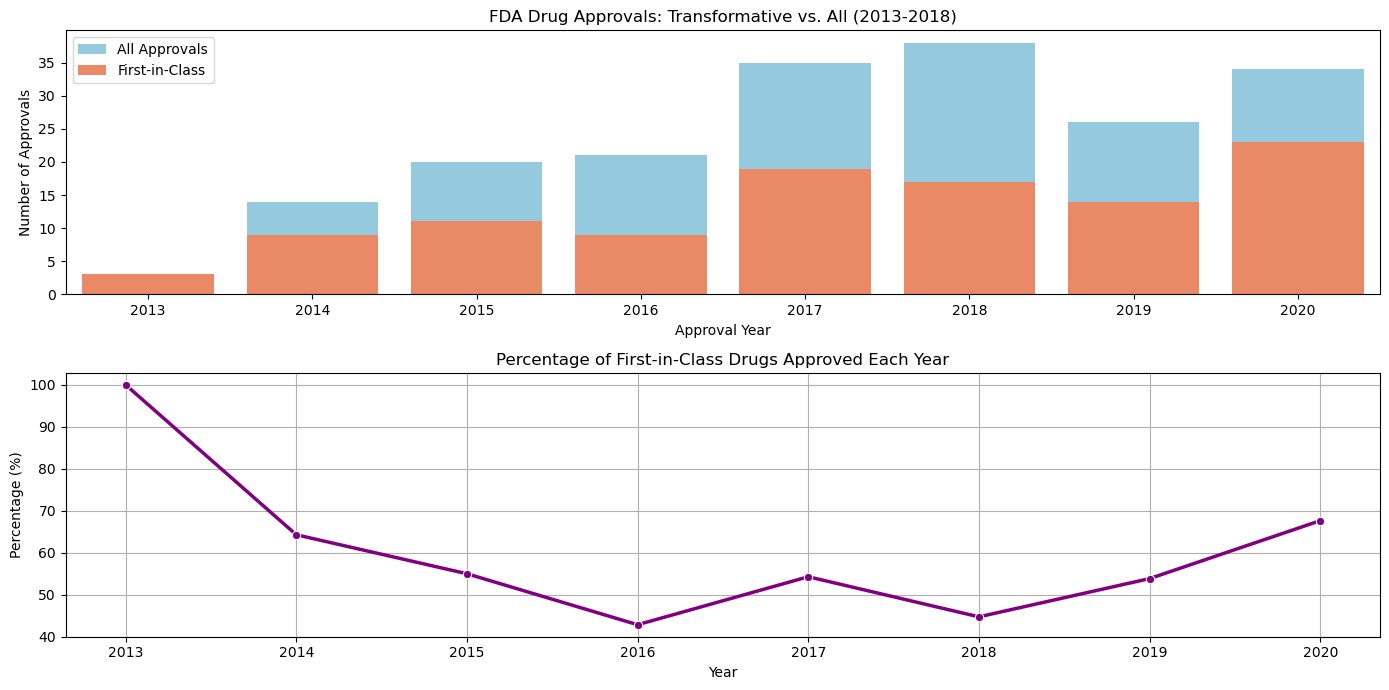

In [34]:
# The data is prepared
# Create new columns to sort first in class drugs and original drugs
df['is_original'] = df['Submission Type and Number'].str.startswith('ORIGINAL') # If the string starts with original it is an original drug
df['is_first_in_class'] = df['Submission Type and Number'] == 'ORIGINAL-1' #If the string starts with original-1 then it is first-in-class

# Count transformative drugs by year
transformative = df[df['is_first_in_class']].groupby('Approval Year').size() #groups the years where first-in-class is true and counts the number of applications
all_drugs = df.groupby('Approval Year').size() #Counts the no. of approvals each year
percentage_transformative = (transformative / all_drugs * 100).fillna(0) # Calculates percentage of first-in-class drug approvals each year and replaces missing values with 0

# Create the visualization
plt.figure(figsize=(14, 7))

# Bar plot for all approvals
plot1 = plt.subplot(2, 1, 1)
sns.barplot(x=all_drugs.index, y=all_drugs.values, color='skyblue', label='All Approvals')
sns.barplot(x=transformative.index, y=transformative.values, color='coral', label='First-in-Class')
plt.title('FDA Drug Approvals: Transformative vs. All (2013-2018)')
plt.ylabel('Number of Approvals')
plt.legend()

# Line plot for percentage
plot2 = plt.subplot(2, 1, 2)
sns.lineplot(x=percentage_transformative.index, 
             y=percentage_transformative.values, 
             marker='o', 
             color='purple',
             linewidth=2.5)
plt.title('Percentage of First-in-Class Drugs')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid(True)

plt.tight_layout()
plt.show()



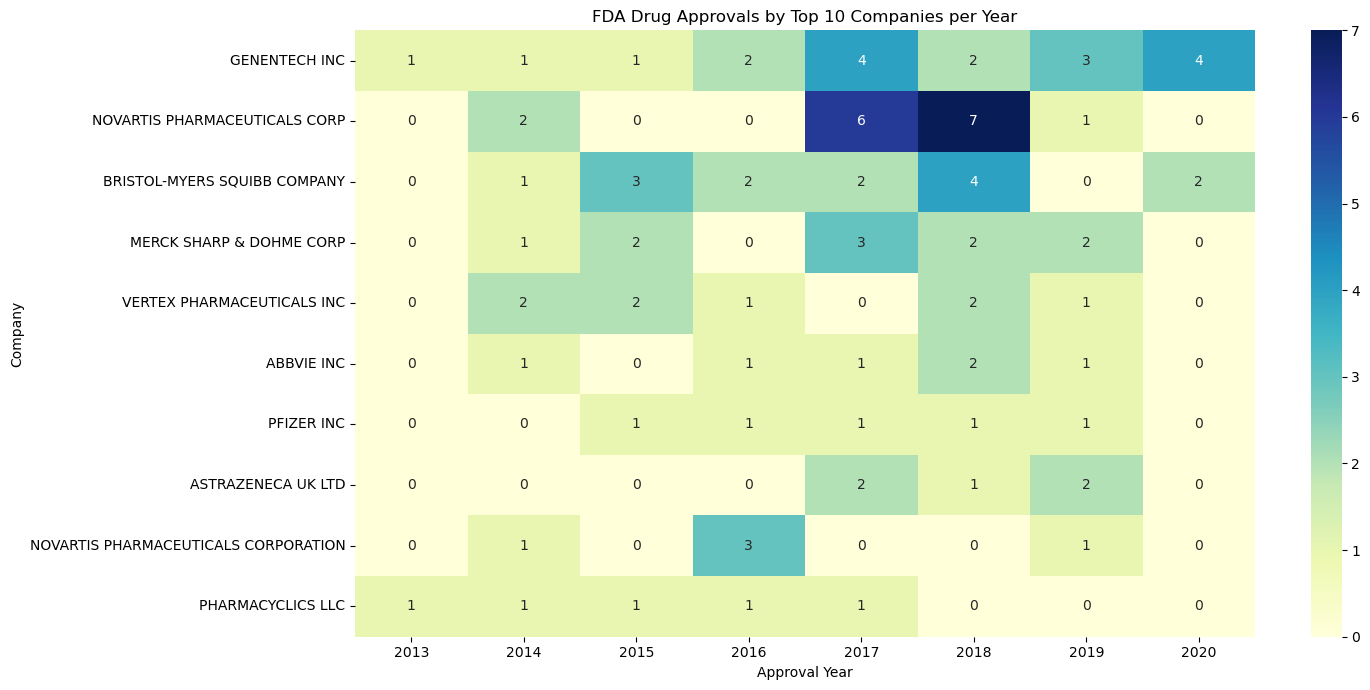

In [82]:
# Create a pivot table with Applicant as rows, Approval Year as columns, and counts of approvals
company_year_pivot = df.pivot_table(index='Applicant', columns='Approval Year', 
                                    values='Submission Type and Number', aggfunc='count', fill_value=0) #The pivot table
plt.figure(figsize=(15, 7))
sns.heatmap(company_year_pivot.loc[company_year_pivot.sum(axis=1).sort_values(ascending=False).head(10).index],
            annot=True, fmt='d', cmap='YlGnBu')
plt.title('FDA Drug Approvals by Top 10 Companies per Year')
plt.xlabel('Approval Year')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

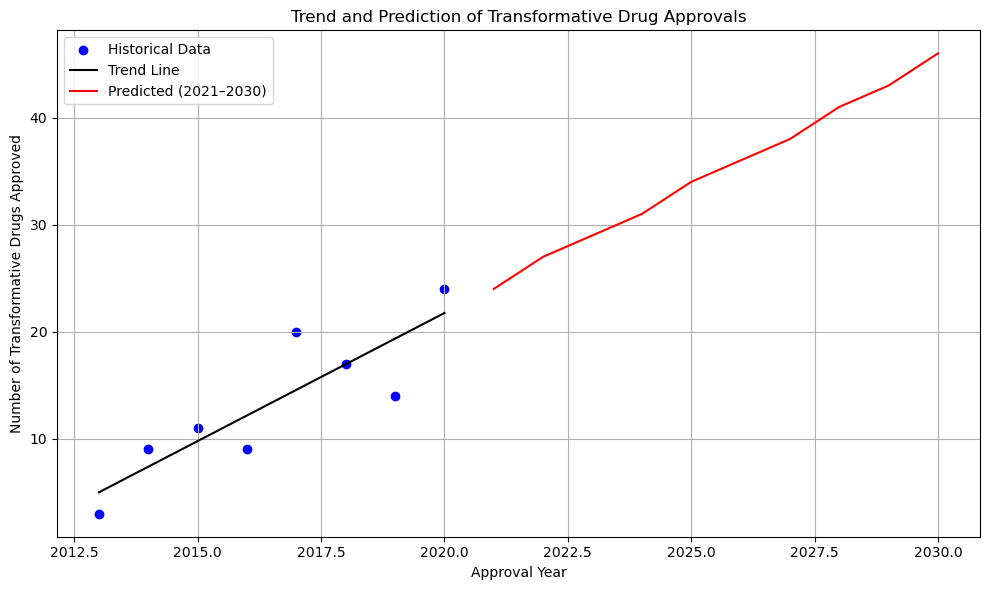

   Approval Year  Predicted Drug Count
0           2021                    24
1           2022                    27
2           2023                    29
3           2024                    31
4           2025                    34
5           2026                    36
6           2027                    38
7           2028                    41
8           2029                    43
9           2030                    46


In [88]:
# Step 1: Identify transformative drugs (assuming "ORIGINAL" means new transformative drugs)
df['Is_Original'] = df['Submission Type and Number'].str.contains("ORIGINAL", case=False)
originals = df[df['Is_Original']]

# Step 2: Count transformative drugs approved each year
yearly_counts = originals.groupby('Approval Year').size().reset_index(name='Drug Count')

# Step 3: Train linear regression model on data up to 2020
train_data = yearly_counts[yearly_counts['Approval Year'] <= 2020]
x_train = train_data[['Approval Year']]
y_train = train_data['Drug Count']

model = LinearRegression()
model.fit(x_train, y_train)

# Step 4: Predict drug approvals from 2021 to 2030
future_years = pd.DataFrame({'Approval Year': list(range(2021, 2031))})
future_predictions = model.predict(future_years)
future_years['Predicted Drug Count'] = future_predictions.round().astype(int)  # Round to whole numbers

# Step 5: Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Historical Data')
plt.plot(x_train, model.predict(x_train), color='black', linestyle='-', label='Trend Line')
plt.plot(future_years['Approval Year'], future_years['Predicted Drug Count'], color='red', label='Predicted (2021–2030)')
plt.xlabel('Approval Year')
plt.ylabel('Number of Transformative Drugs Approved')
plt.title('Trend and Prediction of Transformative Drug Approvals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Display future predictions
print(future_years)